<a href="https://colab.research.google.com/github/jasen8651/python001/blob/master/%EC%98%81%ED%99%94%EC%8A%A4%ED%86%A0%EB%A6%AC2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##워드 클라우드와 텍스트 마이닝

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

#jpype 설치 : 
파이선에서 자바라이브러리를 이용할수 있도록 설치

In [2]:
!pip install -U "jpype1<1.1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.8 MB 5.5 MB/s 


In [3]:
#한글을 사용하기 위해 세종사전을 이용
!pip install konlpy
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
## 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

#  경로 변경
%cd /content/drive/MyDrive/python_demo

Mounted at /content/drive
/content/drive/MyDrive/python_demo


In [5]:
#기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 전처리
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

In [ ]:
!pip list

In [11]:
#데이터 가져오기 
df = pd.read_csv('data_crowing/movie_revirew.csv')
df.head()

,Unnamed: 0,title,story,genre,genre_code
0,0,탑건: 매버릭,최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...,['액션'],[2]
1,1,인생은 뷰티풀: 비타돌체,언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...,"['공연실황', '다큐멘터리']","[1, 15]"
2,2,클라우스,편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...,"['애니메이션', '코미디', '가족']","[3, 12, 14]"
3,3,할머니의 먼 집,아흔 셋 나의 사랑하는 할머니가 자살을 시도했다 취업준비를 하며 보내던 어느 날 ...,['다큐멘터리'],[15]
4,4,밥정,잔디 잡초 이끼 나뭇가지 자연을 재료 삼아 요리를 만드는 방랑식객 임지호 셰프 친...,"['다큐멘터리', '드라마']","[15, 9]"


In [12]:
df.shape

(50, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50 non-null     int64 
 1   title       50 non-null     object
 2   story       50 non-null     object
 3   genre       50 non-null     object
 4   genre_code  50 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.1+ KB


In [14]:
#명사단어 추출
from konlpy.tag import Okt
twitter = Okt()


In [15]:
#2단어 리스트 만들기
word_list = []
word_list = df['story']

In [ ]:
word_list

In [16]:
#3형태소 분리 및 품사 태깅
sentences_tag =[]
for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)
print(morph)

[('인피니티', 'Noun'), ('워', 'Noun'), ('이후', 'Noun'), ('절반', 'Noun'), ('만', 'Josa'), ('살아남은', 'Verb'), ('지구', 'Noun'), ('\xa0', 'Foreign'), ('마지막', 'Noun'), ('희망이', 'Noun'), ('된', 'Verb'), ('어벤져스', 'Noun'), ('\xa0', 'Foreign'), ('먼저', 'Noun'), ('떠난', 'Verb'), ('그', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('위해', 'Noun'), ('모든', 'Noun'), ('것', 'Noun'), ('을', 'Josa'), ('걸었다', 'Verb'), ('\xa0\xa0', 'Foreign'), ('위대한', 'Adjective'), ('어벤져스', 'Noun'), ('\xa0', 'Foreign'), ('운명', 'Noun'), ('을', 'Josa'), ('바꿀', 'Verb'), ('최후', 'Noun'), ('의', 'Josa'), ('전쟁', 'Noun'), ('이', 'Josa'), ('펼쳐진다', 'Verb')]


In [17]:
#4명사만 추출
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      noun_list.append(word)

In [18]:
noun_list

['최고',
 '파일럿',
 '이자',
 '전설',
 '인물',
 '매버릭톰',
 '크루즈',
 '은',
 '자신',
 '졸업',
 '훈련',
 '학교',
 '교관',
 '발탁',
 '다그',
 '명성',
 '팀원',
 '매버릭',
 '지시',
 '무시',
 '실전',
 '방불',
 '케',
 '상공',
 '훈련',
 '눈',
 '전설',
 '조종',
 '실력',
 '모두',
 '압도',
 '버릭',
 '지휘',
 '아래',
 '팀워크',
 '팀원',
 '국경',
 '임무',
 '자매',
 '버릭',
 '자신',
 '동료',
 '마지막',
 '하늘',
 '위',
 '비행',
 '화면',
 '정',
 '중앙',
 '스포트라이트',
 '몸',
 '스타',
 '트바',
 '로티',
 '김호중',
 '그',
 '틀',
 '바깥',
 '구석',
 '지고',
 '어',
 '두운',
 '불구',
 '또',
 '다른',
 '이야기',
 '김호중',
 '두',
 '극장',
 '영화',
 '인생',
 '뷰티풀',
 '비타',
 '돌체',
 '틀',
 '바깥',
 '이야기',
 '사람',
 '시선',
 '보이지',
 '청년',
 '김호중',
 '이야기',
 '그것',
 '가수',
 '김호중',
 '목소리',
 '전',
 '공연',
 '실황',
 '다큐멘터리',
 '인생',
 '뷰티풀',
 '비타',
 '돌체',
 '오직',
 '이',
 '영화',
 '위해',
 '무대',
 '김호중',
 '단독',
 '공연',
 '최초',
 '공개',
 '트로트',
 '가수',
 '김호중',
 '고정관념',
 '처음',
 '음악',
 '대한',
 '열정',
 '해',
 '준',
 '클래식',
 '음악',
 '구성',
 '그',
 '웅장',
 '목소리',
 '감상',
 '수',
 '여기',
 '꿈',
 '스무',
 '살',
 '음악',
 '대한',
 '동경',
 '이탈리아',
 '다시',
 '김호중',
 '다큐',
 '여행기',
 '버스킹',
 '공연',
 '모두',
 '김호중',
 '그동안',
 

In [19]:
#5 명사가 두 문자 이상만 추출
len(noun_list)

noun_list = [n for n in noun_list if len(n)>1]
noun_list[:100]

['최고',
 '파일럿',
 '이자',
 '전설',
 '인물',
 '매버릭톰',
 '크루즈',
 '자신',
 '졸업',
 '훈련',
 '학교',
 '교관',
 '발탁',
 '다그',
 '명성',
 '팀원',
 '매버릭',
 '지시',
 '무시',
 '실전',
 '방불',
 '상공',
 '훈련',
 '전설',
 '조종',
 '실력',
 '모두',
 '압도',
 '버릭',
 '지휘',
 '아래',
 '팀워크',
 '팀원',
 '국경',
 '임무',
 '자매',
 '버릭',
 '자신',
 '동료',
 '마지막',
 '하늘',
 '비행',
 '화면',
 '중앙',
 '스포트라이트',
 '스타',
 '트바',
 '로티',
 '김호중',
 '바깥',
 '구석',
 '지고',
 '두운',
 '불구',
 '다른',
 '이야기',
 '김호중',
 '극장',
 '영화',
 '인생',
 '뷰티풀',
 '비타',
 '돌체',
 '바깥',
 '이야기',
 '사람',
 '시선',
 '보이지',
 '청년',
 '김호중',
 '이야기',
 '그것',
 '가수',
 '김호중',
 '목소리',
 '공연',
 '실황',
 '다큐멘터리',
 '인생',
 '뷰티풀',
 '비타',
 '돌체',
 '오직',
 '영화',
 '위해',
 '무대',
 '김호중',
 '단독',
 '공연',
 '최초',
 '공개',
 '트로트',
 '가수',
 '김호중',
 '고정관념',
 '처음',
 '음악',
 '대한',
 '열정',
 '클래식']

In [20]:
#6단어 카운팅
counts = Counter(noun_list)
tags = counts.most_common(30) #30개만 가져옴
len(tags)
tags

[('자신', 29),
 ('위해', 26),
 ('시작', 24),
 ('사랑', 21),
 ('사람', 19),
 ('김호중', 15),
 ('이야기', 15),
 ('인생', 13),
 ('다시', 13),
 ('세상', 13),
 ('모두', 12),
 ('아들', 12),
 ('전쟁', 12),
 ('시간', 12),
 ('케빈', 12),
 ('가장', 11),
 ('어머니', 11),
 ('운명', 11),
 ('아이', 10),
 ('명의', 10),
 ('사건', 10),
 ('그녀', 10),
 ('라이언', 10),
 ('황제', 10),
 ('임무', 9),
 ('마음', 9),
 ('엄마', 9),
 ('모든', 9),
 ('하나', 9),
 ('발견', 9)]

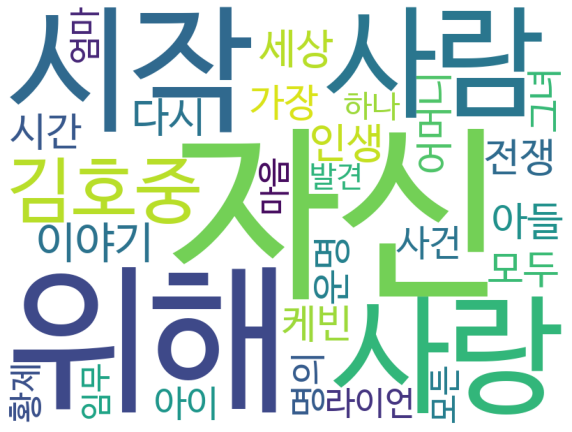

In [21]:
#wordcloud 생성
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()